In [1]:
import pandas as pd
import numpy as np

In [2]:
# Pandas

# Pandas - это библиотека для работы с табличными данными, которая также включает базовые функции для визуализации. Эти функции основаны на Matplotlib и имеют следующие характеристики:

# Простота использования: Pandas позволяет создавать графики напрямую из DataFrame, что упрощает процесс визуализации данных без необходимости писать много кода (например, df.plot()).
# Ограниченные возможности: Визуализация с помощью Pandas менее гибкая и функциональная по сравнению с Matplotlib и Seaborn. Она предоставляет базовые графики, такие как линейные графики, гистограммы и диаграммы рассеяния, размаха и т.д.
# Интеграция с Matplotlib: Графики, созданные с использованием библиотеки Pandas, можно настраивать с помощью Matplotlib для более детализированной визуализации.
# Когда использовать Pandas:

# Для быстрого создания базовых графиков прямо из DataFrame.
# Когда требуется быстро посмотреть на данные без необходимости создания сложных графиков.
# На начальных этапах анализа данных для быстрого понимания структуры и распределения данных.

# 5  Визуализация

# 5.1 Метод plot()

# kind='line'

In [3]:
unemployment_eu = pd.read_excel(r'data\unemployment_eu.xlsx')
unemployment_eu.head()

,Дата выпуска,Факт,Прогноз
0,01.08.2023 (июнь),6.4,6.5
1,30.06.2023 (май),6.5,6.5
2,01.06.2023 (апр),6.5,6.5
3,03.05.2023 (мар),6.5,6.6
4,31.03.2023 (фев),6.6,6.7


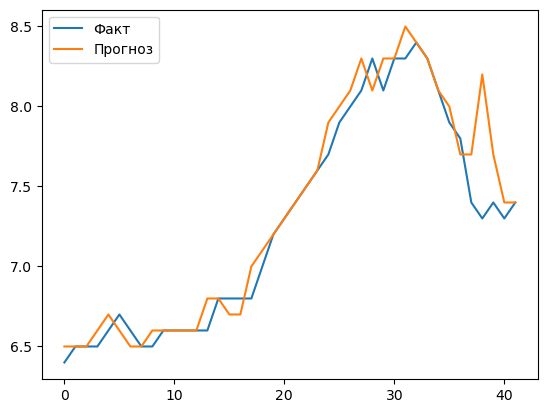

In [4]:
unemployment_eu.plot();
# Неверное построение графика

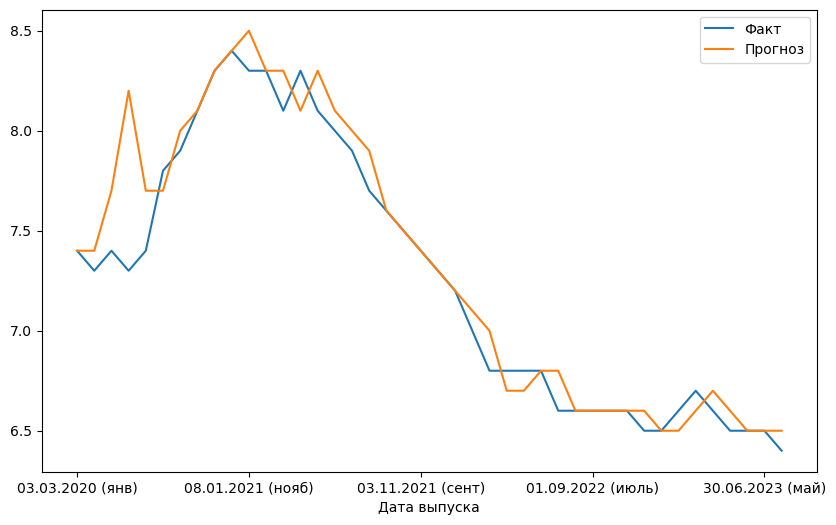

In [5]:
# Параметры x, y, figsize

unemployment_eu = unemployment_eu[::-1] # разворот по датам (от меньшей к большей)
unemployment_eu.plot(x='Дата выпуска',    # по оси X будут данные из колонки 'Дата выпуска'
                     y=['Факт', 'Прогноз'], # по оси Y будут данные из колонки 'Факт' и 'Прогноз'
                     figsize=(10,6));          # размер фигуры

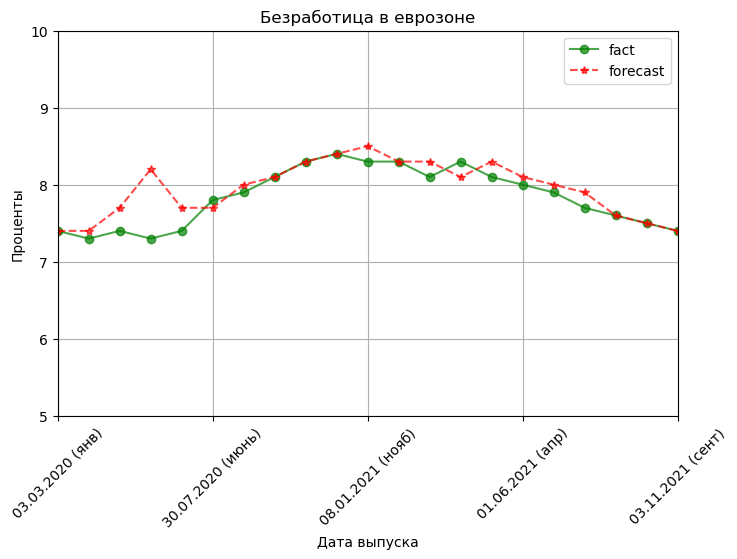

In [6]:
# Параметры

unemployment_eu.plot(x='Дата выпуска',                          # - значения оси X
                     y=['Факт', 'Прогноз'],                     # - значения оси Y
                     figsize=(8,5),                             # - размер рисунка
                     title='Безработица в еврозоне',            # - заголовок рисунка
                     xlabel='Дата выпуска',                     # - наименование оси X
                     ylabel='Проценты',                         # - наименование оси Y
                     grid=True,                                 # - нанесение линий сетки на график
                     xlim=[0,20],                               # - предел отображения по оси X
                     ylim=[5,10],                               # - предел отображения по оси Y
                     xticks=[0, 5, 10, 15, 20, 25, 30, 35, 41], # - значения для меток осей X
                     yticks=[0,1,2,3,4,5,6,7,8,9,10],           # - значения для меток осей Y
                     rot=45,                                    # - 'horizontal', 'vertical', число или None
                     legend=True,                               # - отображение легеды
                     label=['fact', 'forecast'],                # - наименования в легенде
                     color=['green', 'red'],                    # - наименования в легенде
                     style=['o-', '*--'],                       # - стиль меток и линий
                     alpha=0.7);                                # - насещенность цветов

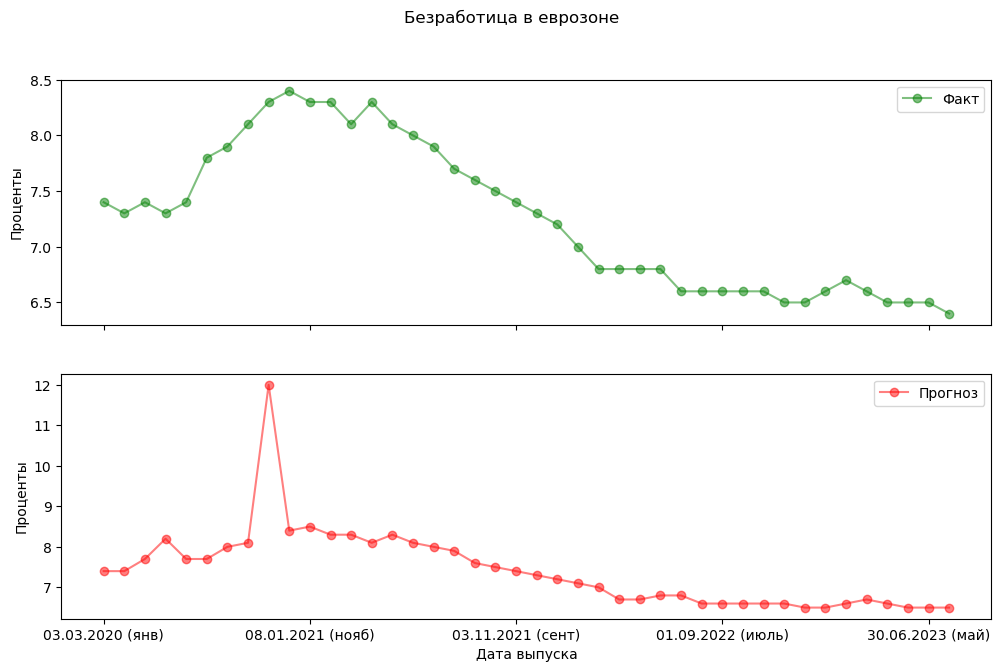

In [7]:
unemployment_eu.loc[33, 'Прогноз'] = 12

unemployment_eu.plot(x='Дата выпуска',
                     figsize=(12,7),                     
                     title='Безработица в еврозоне',
                     ylabel='Проценты',
                     color=['green', 'red'],
                     style='o-',
                     alpha=0.5,
                     subplots=True,        # - каждый столбец датафрейма в отдельном подграфике
                     sharex=True,          # - cвязь меток по X (один массштаб по оси X)
                     sharey=False);        # - cвязь меток по Y (один массштаб по оси Y)

In [8]:
apple = pd.read_csv(r'data\aapl_close_revenue.csv')
apple.head()

,Дата,Цена закрытия,"Выручка, млрд долл.США"
0,04/2019,50.17,53.81
1,05/2019,43.77,53.81
2,06/2019,49.48,53.81
3,07/2019,53.26,64.04
4,08/2019,52.19,64.04


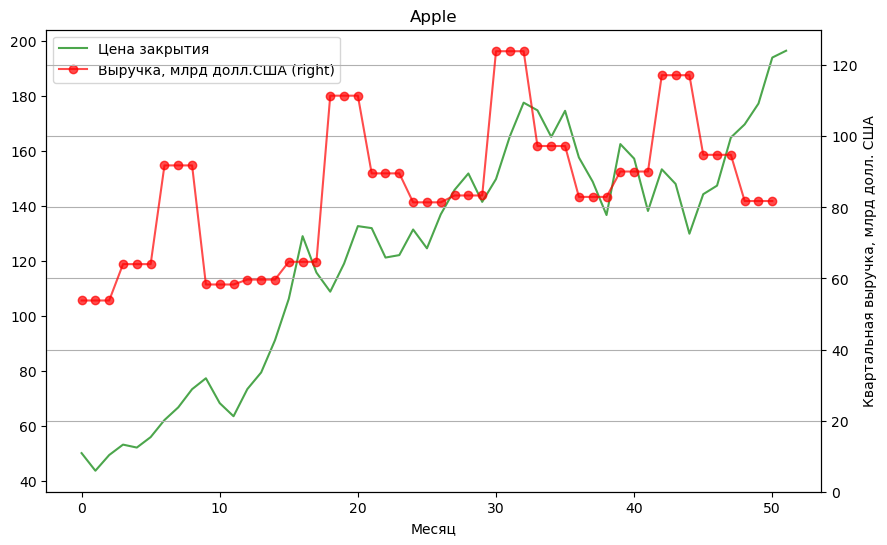

In [9]:
apple.plot(figsize=(10,6),
           title='Apple',
           xlabel='Месяц',
           ylabel='Квартальная выручка, млрд долл. США',
           ylim=[0,130],
           color=['green','red'],
           alpha=0.7,
           grid=True,
           style=['-','o-'],
           legend=True,
           secondary_y='Выручка, млрд долл.США'); # - добавление второй оси

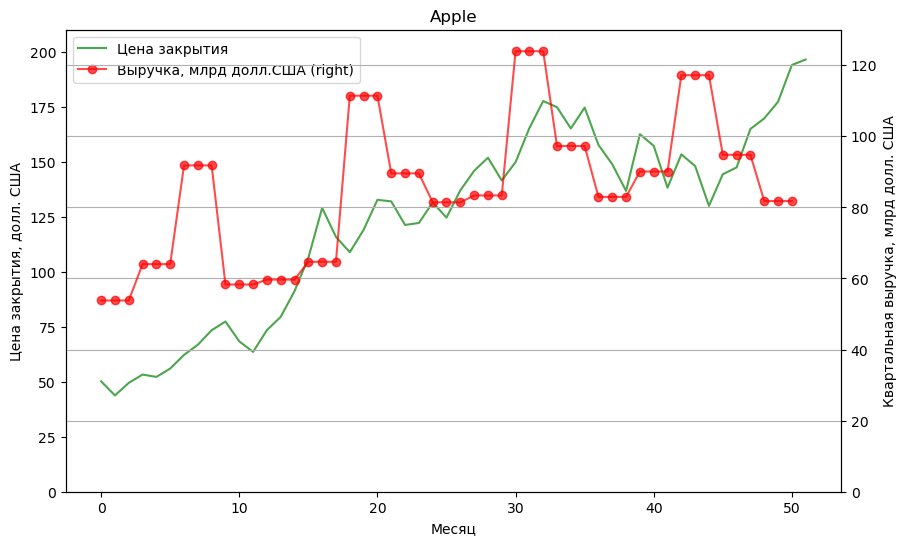

In [10]:
# Либо:

apple['Цена закрытия'].plot(figsize=(10,6), 
                            title='Apple',
                            ylabel='Цена закрытия, долл. США',
                            ylim=[0,210],
                            color='green', 
                            alpha=0.7,
                            legend=True);
apple['Выручка, млрд долл.США'].plot(secondary_y=True,
                                     xlabel='Месяц',
                                     ylabel='Квартальная выручка, млрд долл. США',
                                     ylim=[0,130],
                                     color='red',
                                     alpha=0.7,
                                     grid=True,
                                     style='o-',
                                     legend=True);

In [11]:
# В параметр kind передается наименование типа диаграммы. Он может принимать следующие значения: 'line' (по умолчанию), 'bar', 'barh', 'box', 'hist', 'area', 'pie', 'kde', 'scatter'.

In [12]:
brent_m = pd.read_csv(r'data\brent_m_2008_2023.csv')
brent_m['high - low'] = brent_m['high'] - brent_m['low']
brent_m.head()

,date,low,high,high - low
0,Jan 2008,85.10,98.47,13.37
1,Feb 2008,86.85,101.28,14.43
2,Mar 2008,96.99,107.86,10.87
3,Apr 2008,98.98,117.58,18.60
4,May 2008,108.45,135.11,26.66


# kind='bar'

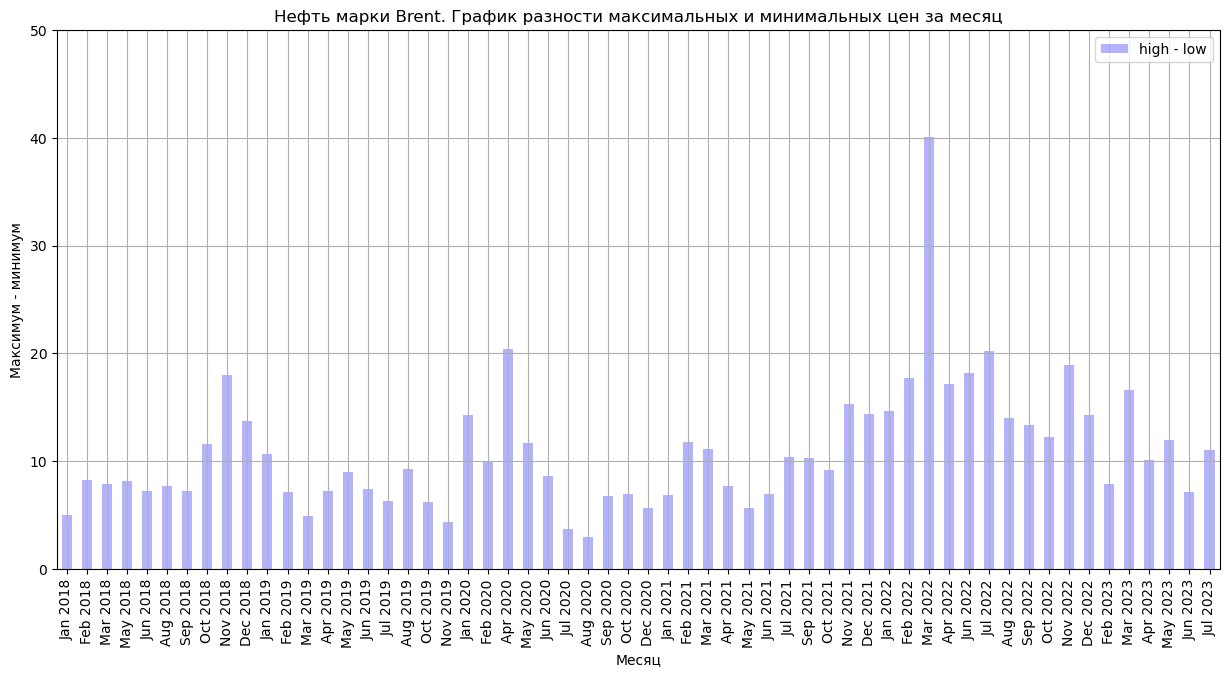

In [13]:
brent_m.loc[102:].plot(kind='bar',
                       x='date', 
                       y='high - low', 
                       figsize=(15,7),                       
                       title='Нефть марки Brent. График разности максимальных и минимальных цен за месяц',
                       xlabel='Месяц',
                       ylabel='Максимум - минимум',
                       color='blue',
                       ylim=[0,50],
                       alpha=0.3,
                       grid=True);

# kind='barh'

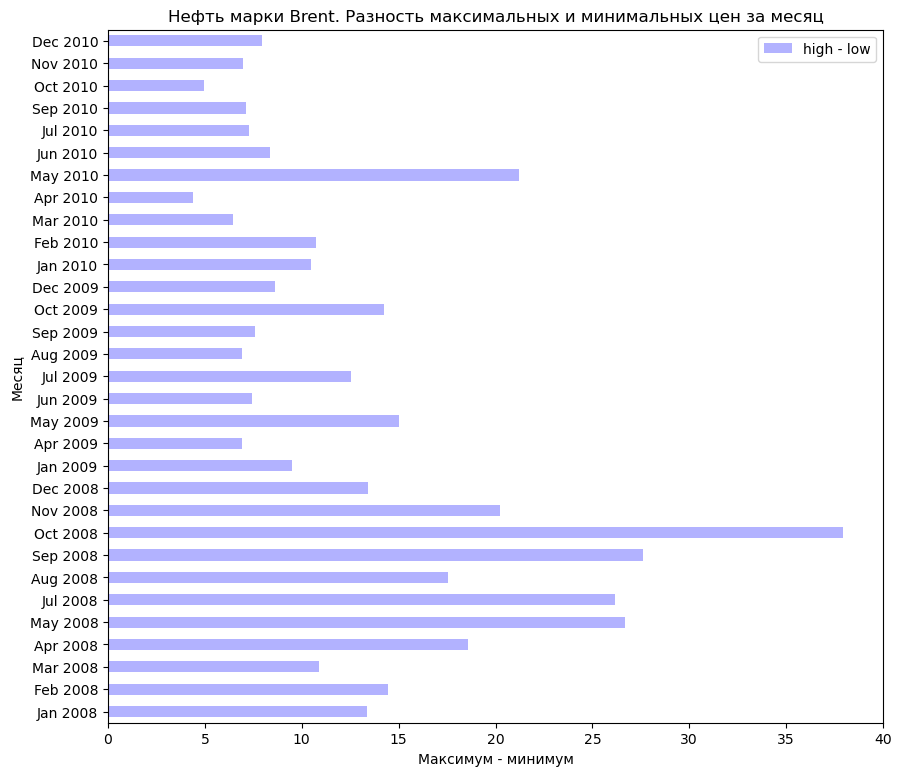

In [14]:
brent_m.loc[:30].plot(kind='barh',
                      x='date',  
                      y='high - low',                                                      
                      figsize=(10,9),                           
                      title='Нефть марки Brent. Разность максимальных и минимальных цен за месяц',
                      xlabel='Максимум - минимум',
                      ylabel='Месяц',
                      color='blue',
                      xlim=[0,40],
                      alpha=0.3);

# Параметр stacked

In [15]:
# Позволяет наслаивать столбцы друг на друга

In [16]:
stocks_values = {'Дата': ['16/08/2023','16/08/2023', '16/08/2023', '17/08/2023', '17/08/2023', 
                '17/08/2023', '18/08/2023', '18/08/2023', '18/08/2023', '21/08/2023',
                '21/08/2023', '21/08/2023', '24/08/2023', '24/08/2023', '24/08/2023', 
                '24/08/2023'],
       'Акция': ['Аэрофлот','Газпром', 'ВТБ', 'Аэрофлот','Газпром', 'ВТБ', 
                 'Аэрофлот','Газпром', 'ВТБ', 'Аэрофлот','Газпром', 'ВТБ', 
                 'Русгидро', 'Аэрофлот','Газпром', 'ВТБ'],       
       'Куплено, руб.': [12900, 26240, 15000, 17670, 3700, 36500, 83250, 14885, 17580, 
                       13700, 27354, 13590, 59400, 38830, 62052, 25708]}
stocks = pd.DataFrame(stocks_values)
display(stocks.head())

,Дата,Акция,"Куплено, руб."
0,16/08/2023,Аэрофлот,12900
1,16/08/2023,Газпром,26240
2,16/08/2023,ВТБ,15000
3,17/08/2023,Аэрофлот,17670
4,17/08/2023,Газпром,3700


In [17]:
# Проведем группировку данных:

stocks_new = stocks.pivot_table(values='Куплено, руб.', index='Дата', columns='Акция', 
                                aggfunc=sum, fill_value=0)
display(stocks_new)

C:\Users\kuche\AppData\Local\Temp\ipykernel_16088\3273720939.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  stocks_new = stocks.pivot_table(values='Куплено, руб.', index='Дата', columns='Акция',


Акция,Аэрофлот,ВТБ,Газпром,Русгидро
Дата,,,,
16/08/2023,12900,15000,26240,0
17/08/2023,17670,36500,3700,0
18/08/2023,83250,17580,14885,0
21/08/2023,13700,13590,27354,0
24/08/2023,38830,25708,62052,59400


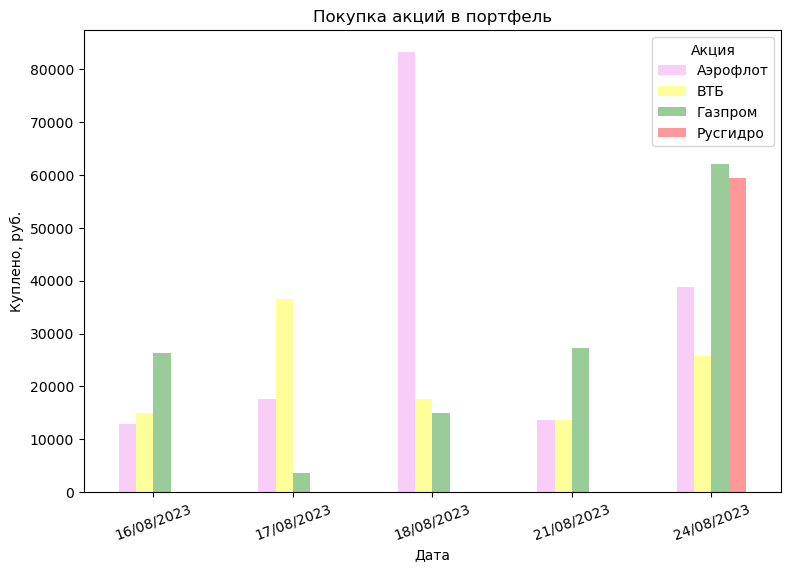

In [18]:
stocks_new.plot(kind='bar', 
                figsize=(9,6),
                title='Покупка акций в портфель',
                xlabel='Дата',
                ylabel='Куплено, руб.',
                color=['violet', 'yellow', 'green', 'red'],
                alpha=0.4,
                rot=20);

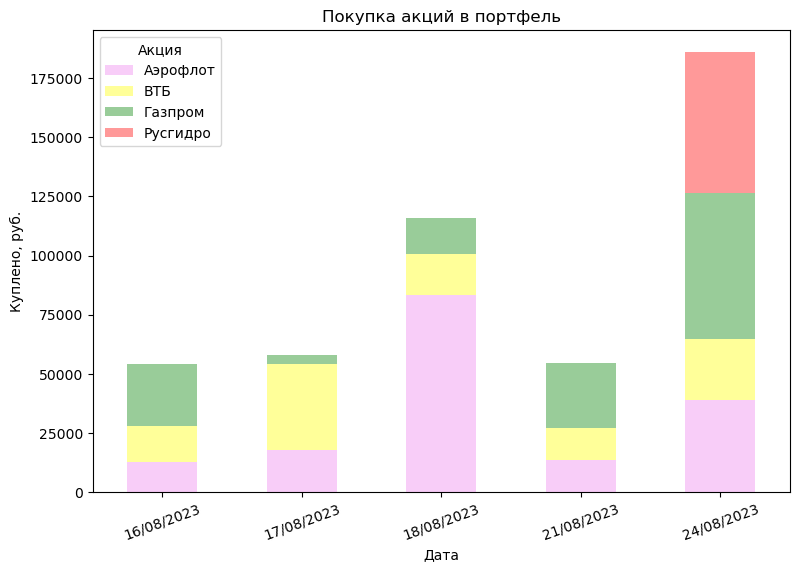

In [19]:
# С параметром stacked=True:

stocks_new.plot(kind='bar', 
                stacked=True, 
                figsize=(9,6),
                title='Покупка акций в портфель',
                xlabel='Дата',
                ylabel='Куплено, руб.',
                color=['violet', 'yellow', 'green', 'red'],
                alpha=0.4,
                rot=20);

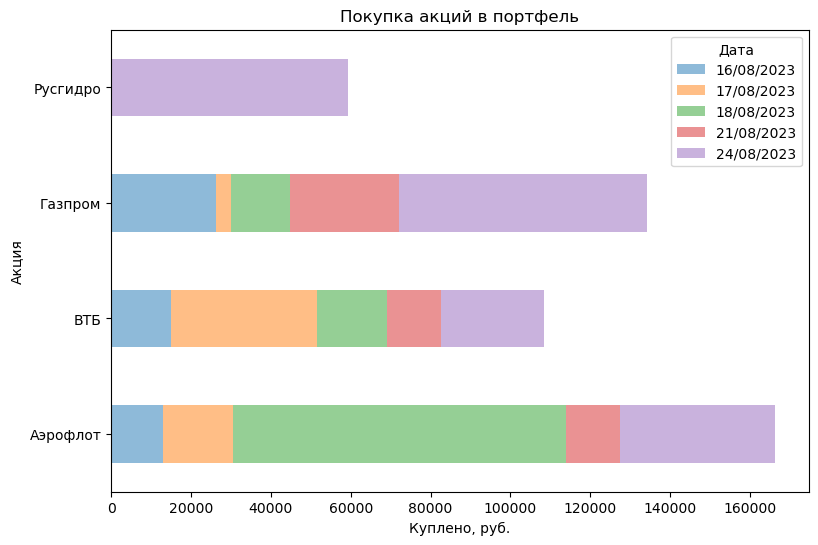

In [20]:
stocks_new.T.plot(kind='barh', 
                stacked=True, 
                figsize=(9,6), 
                title='Покупка акций в портфель',
                xlabel='Куплено, руб.',
                ylabel='Акция',
                alpha=0.5);

# kind='pie'

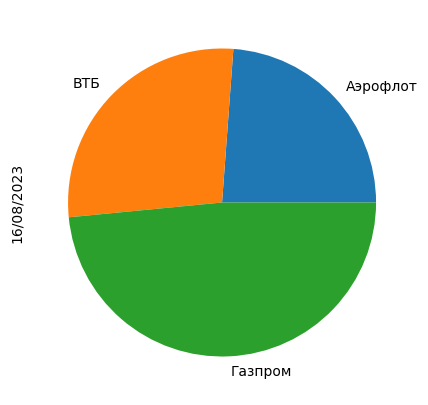

In [21]:
stocks_new.loc['16/08/2023'].plot(kind='pie', 
                                  figsize=(5,5));

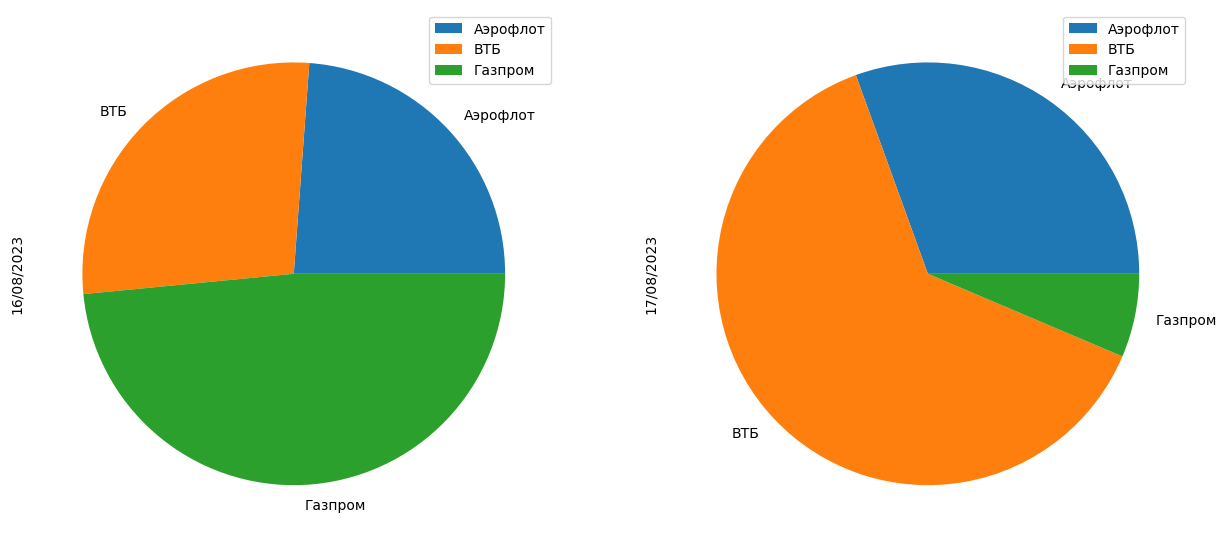

In [22]:
stocks_new[:2].T.plot(kind='pie',
                      subplots=True,
                      figsize=(15,10));

# kind='area'

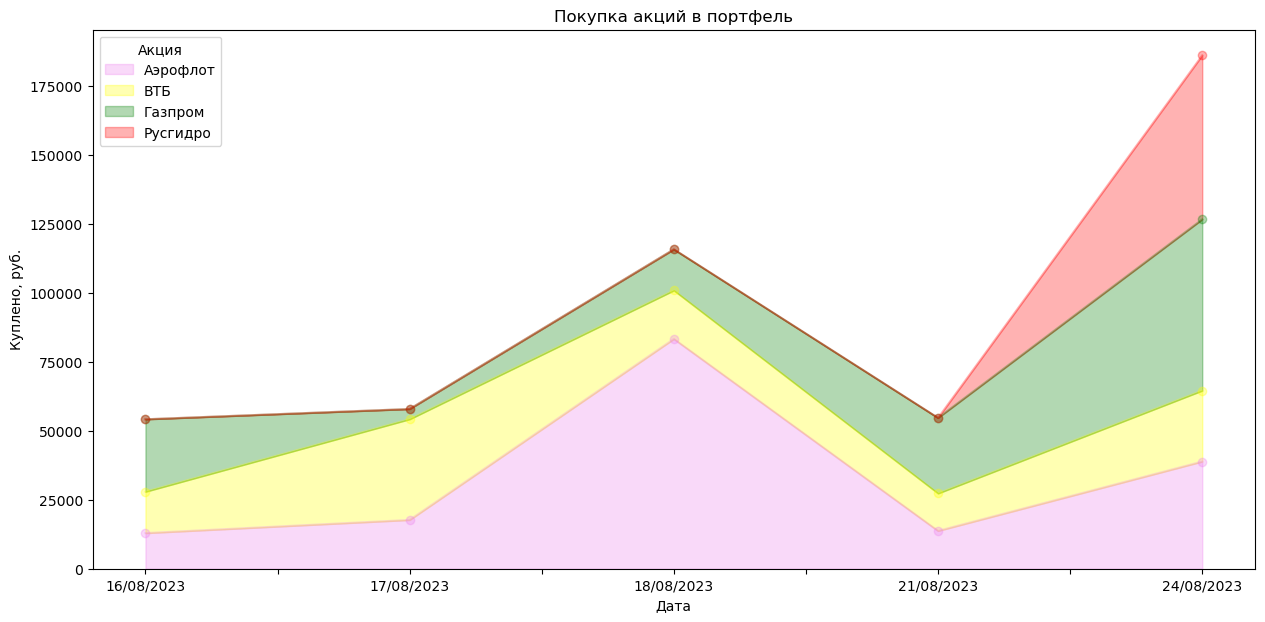

In [23]:
# 'area' - это тот же линейный график, только с закрашенной областью под линией графика.

stocks_new.plot(figsize=(15,7),
                kind='area',
                title='Покупка акций в портфель',
                xlabel='Дата',
                ylabel='Куплено, руб.',
                color=['violet', 'yellow', 'green', 'red'],
                style='o-',
                alpha=0.3);

In [24]:
platinum_gold = pd.read_csv('data\platinum_gold_m_01.01.18_31.08.23.csv')
platinum_gold.head()

,Дата,Цена_platinum,Цена_gold
0,01.01.2018,1014.0,1348.4
1,01.02.2018,997.9,1323.7
2,01.03.2018,939.4,1333.3
3,01.04.2018,915.9,1325.3
4,01.05.2018,920.9,1310.8


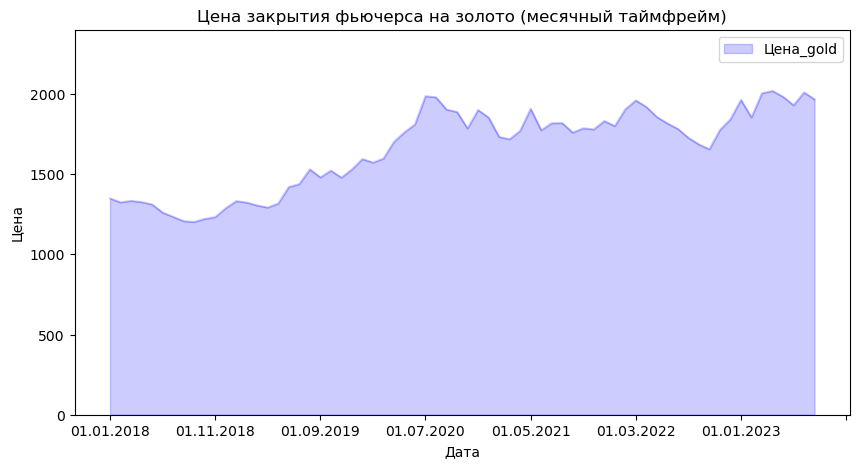

In [25]:
platinum_gold.plot(kind='area',
                   figsize=(10,5),
                   x='Дата',
                   y='Цена_gold',
                   title='Цена закрытия фьючерса на золото (месячный таймфрейм)',
                   xlabel='Дата',
                   ylabel='Цена',
                   color='blue',
                   alpha=0.2,
                   ylim=[0, 2400]);

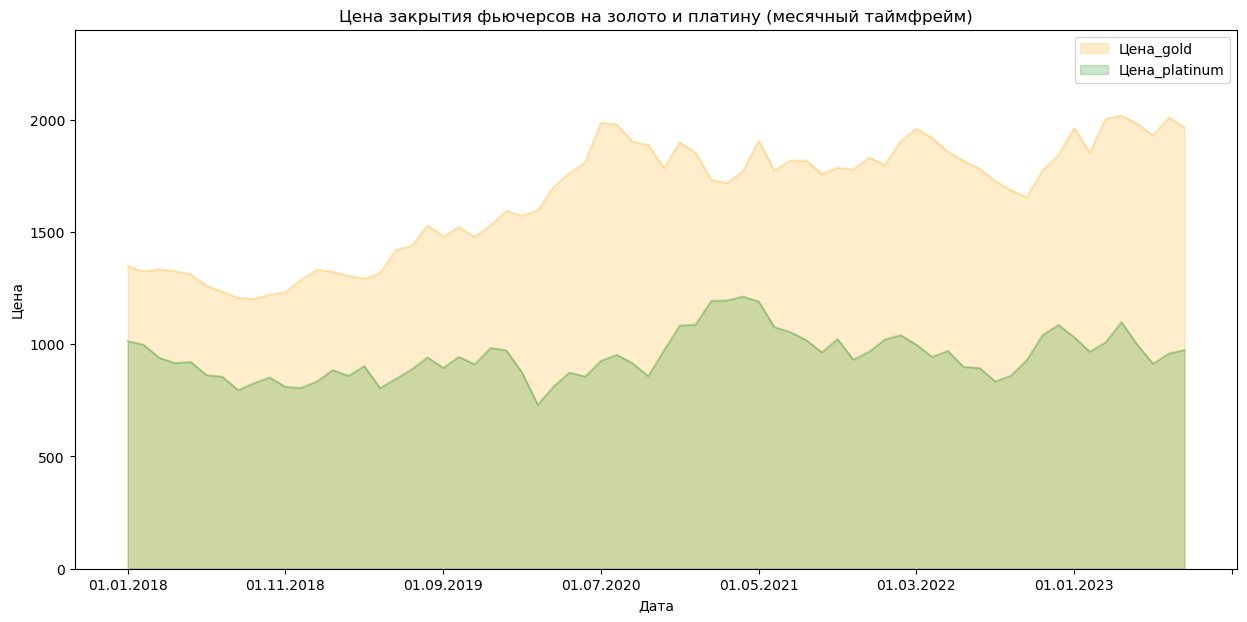

In [26]:
platinum_gold.plot(kind='area',
                   figsize=(15,7),
                   x='Дата',
                   y=['Цена_gold', 'Цена_platinum'],
                   title='Цена закрытия фьючерсов на золото и платину (месячный таймфрейм)',
                   xlabel='Дата',
                   ylabel='Цена',
                   color=['orange', 'green'],
                   alpha=0.20,
                   ylim=[0, 2400],
                   stacked=False);

# kind='box'

In [27]:
# Такие диаграммы называют: "диаграмма размаха", "ящик с усами" или боксплот.

# Диаграмма размаха строится по 5 параметрам: минимум, первый квартиль (Q1), медиана, третий квартиль (Q3) и максимум:

# Медиана (Q2 или 50% процентиль) - медианное значение набора данных.
# Первый квартиль (Q1 или 25% процентиль) - медиана между наименьшим значением выборки и медианой всего набора данных (Q2).
# Третий квартиль (Q3 или 75% процентиль) - медиана между наибольшим значением выборки и медианой всего набора данных (Q2).
# Межквартильный размах (IQR) - диапазон от 25-го до 75-го процентиля.
# Первый квартиль, медиана и третий квартиль делят диаграмму на четыре части, в каждой из которых находятся примерно по 25% от всего набора данных. 
# Почему примерно? Потому что иногда количество всех данных невозможно разделить на 4 без остатка.
# Максимум рассчитывается как (Q3 + 1,5*IQR). Значения, которые больше этой величины, считаются выбросами, не попадают в диаграмму и обозначаются на графике кружочками. 
# Максимальное значение, находящееся в диапазоне (Q3 + 1,5*IQR), обозначается как вершина диаграммы. Растояние от третьего квартиля до вершины диаграммы называют "верхним усом".
# Минимум рассчитывается как (Q1 - 1,5*IQR). Значения, которые меньше этой величины, считаются выбросами, не попадают в диаграмму и обозначаются на графике кружочками. 
# Минимальное значение, находящееся в диапазоне (Q1 - 1,5*IQR), обозначается как нижняя точка диаграммы. Растояние от нижней точки до первого квартиля называют "нижним усом".

# Диаграмма размаха может показать выбросы, симметричность данных, насколько плотно они сгруппированы, не перекошены ли, и если перекошены, то каким именно образом.

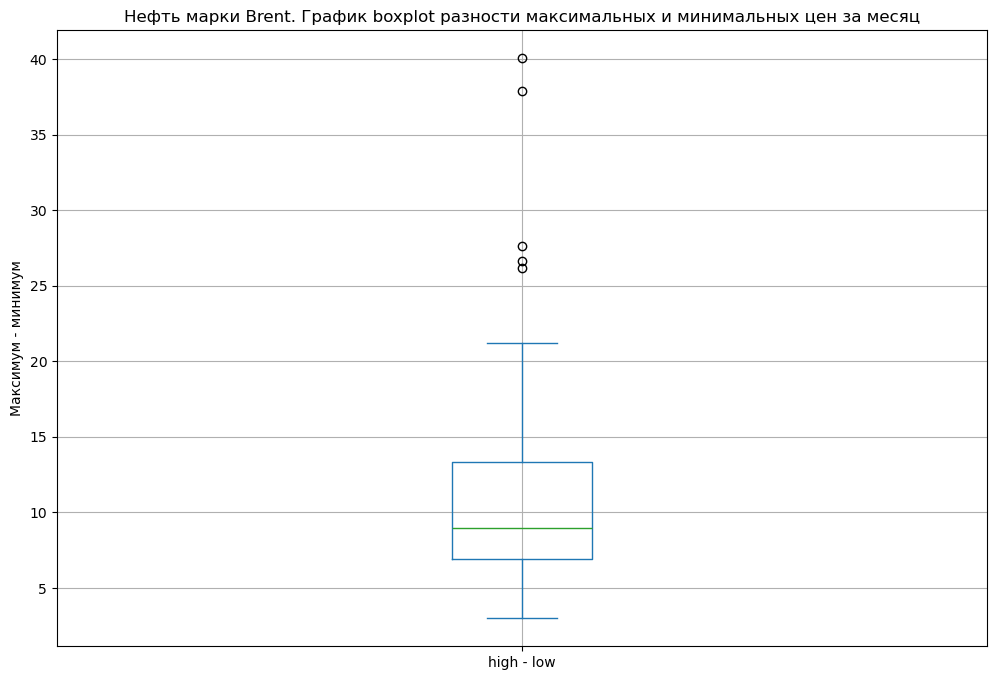

In [28]:
brent_m.plot(kind='box',
             x='date',
             y='high - low',
             figsize=(12,8),
             title='Нефть марки Brent. График boxplot разности максимальных и минимальных цен за месяц',
             ylabel='Максимум - минимум',
             grid=True);

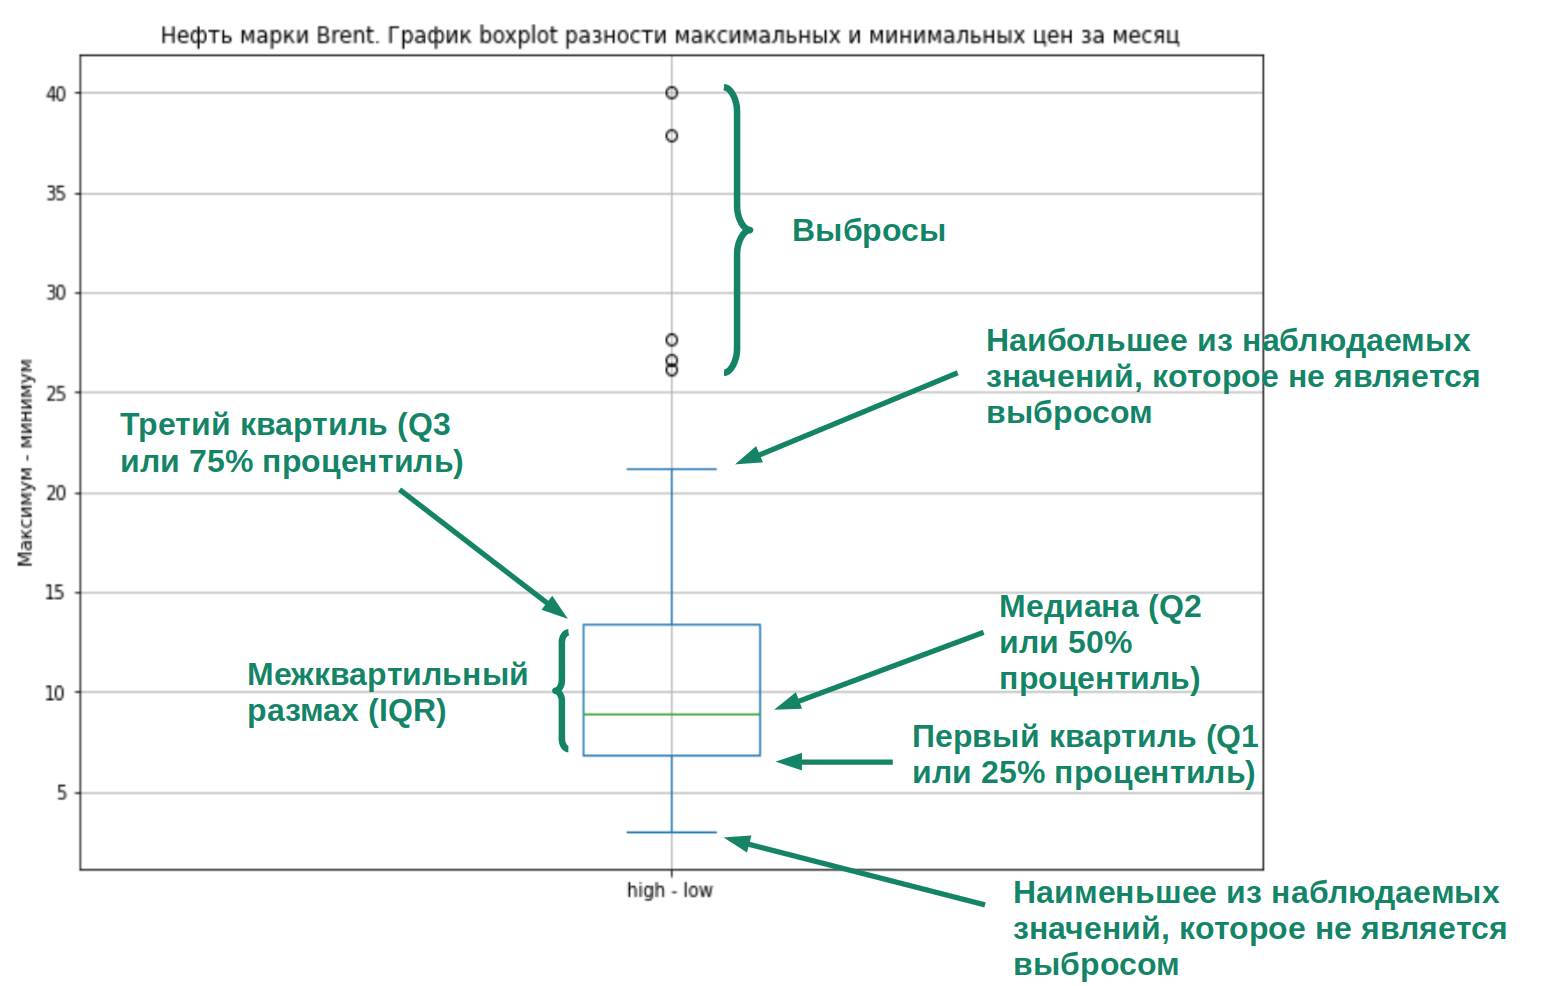

In [29]:
platinum_gold.head()

,Дата,Цена_platinum,Цена_gold
0,01.01.2018,1014.0,1348.4
1,01.02.2018,997.9,1323.7
2,01.03.2018,939.4,1333.3
3,01.04.2018,915.9,1325.3
4,01.05.2018,920.9,1310.8


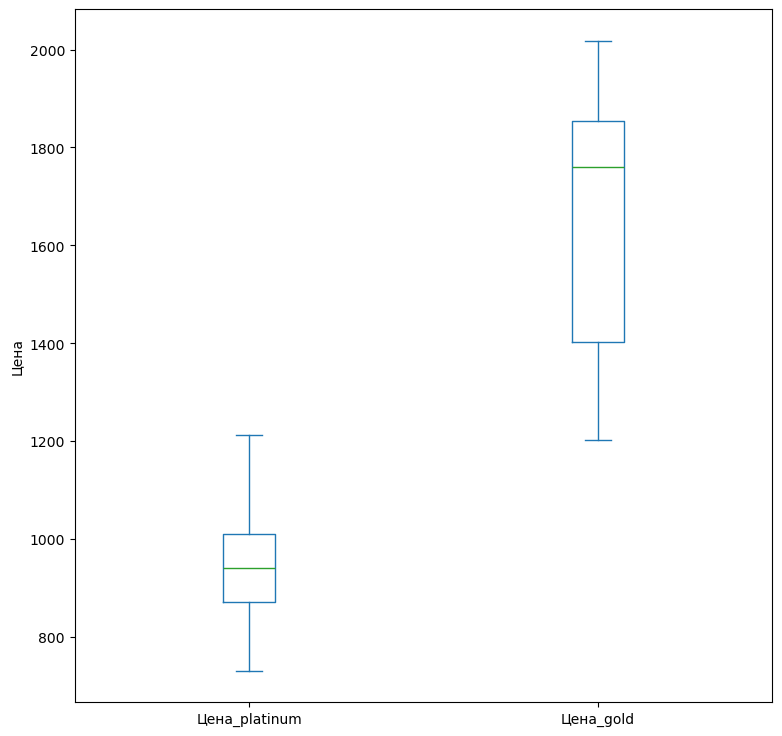

In [30]:
platinum_gold.plot(kind='box',
                   ylabel='Цена',
                   figsize=(9,9));

# Диаграмма, построенная по месячным ценам закрытия фьючерса на золото, имеет медиану, сильно смещенную вверх. 
# Хотя общий размах цен по золоту находится в диапазоне от 1200 до 2000 долларов США за унцию, но половину времени, взятого для анализа временного интервала, 
# цена находилась в диапазоне 1700-2000 долларов. А по диаграмме размаха для платины за период с 2018 года по август 2023 года можно сказать, 
# что форма диаграммы почти близка к симметричной.

# kind='hist'

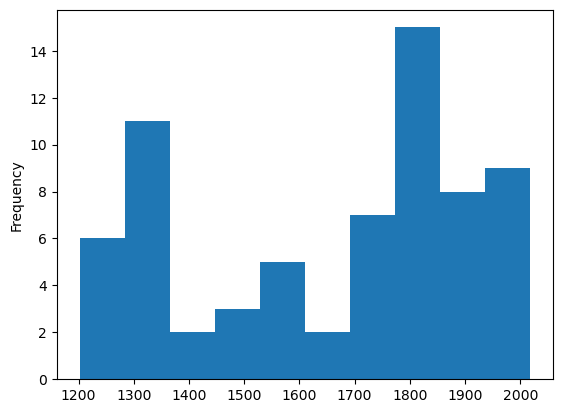

In [31]:
platinum_gold['Цена_gold'].plot(kind='hist');

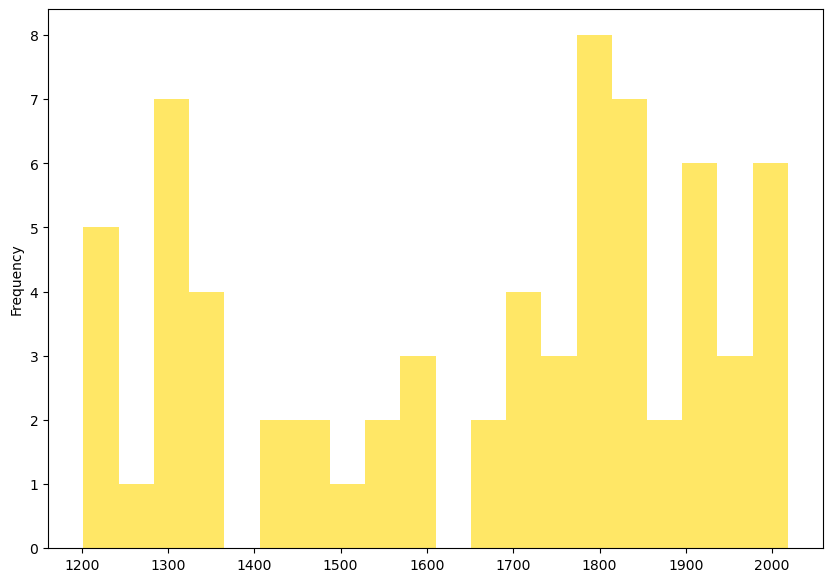

In [32]:
platinum_gold['Цена_gold'].plot(kind='hist',
                                bins=20,
                                figsize=(10,7),                               
                                color='gold',
                                alpha=0.6);

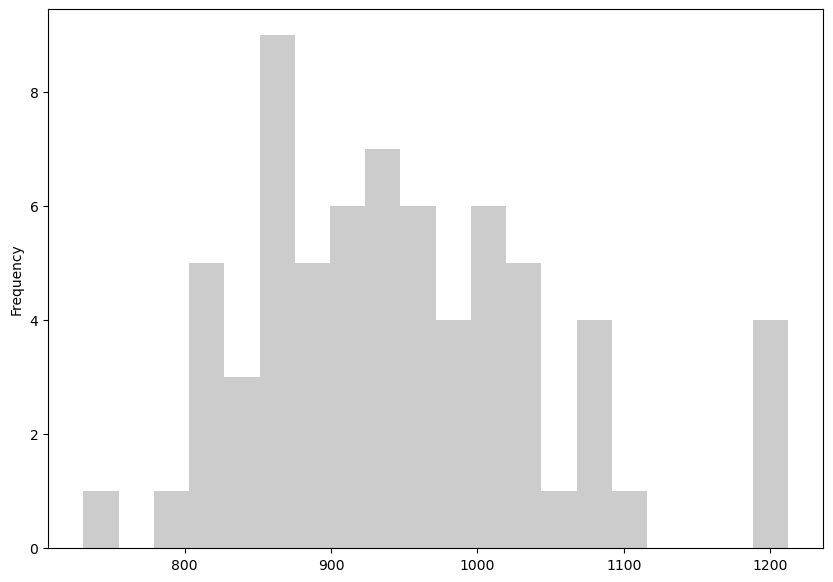

In [33]:
platinum_gold['Цена_platinum'].plot(kind='hist',
                                    bins=20,
                                    figsize=(10,7),                               
                                    color='silver',
                                    alpha=0.8);

# kind='scatter'

In [34]:
# Диаграмма рассеяния (точечная диаграмма) - это диаграмма, изображающая значения двух переменных в виде точек на плоскости.

dxy_gold = pd.read_csv(r'data\dxy_gold_01.01.18_31.08.23.csv')
dxy_gold.head()

,Дата,Цена_dxy,Цена_gold
0,Янв. 18,88.634,1348.4
1,Февр. 18,90.156,1323.7
2,Март 18,89.392,1333.3
3,Апр. 18,91.180,1325.3
4,Май 18,93.514,1310.8


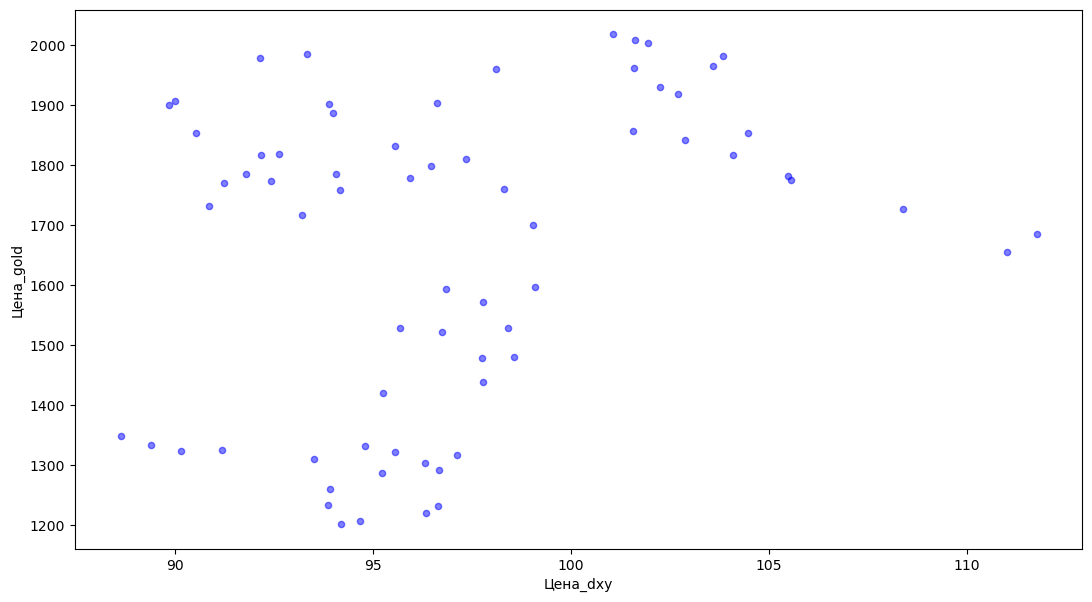

In [35]:
dxy_gold.plot(kind='scatter',
              x='Цена_dxy',
              y='Цена_gold',
              figsize=(13,7),
              c='blue',
              alpha=0.5);

# Давайте посмотрим, есть ли какая-нибудь визуальная взаимосвязь между индексом доллара США (DXY) и ценой фьючерса на золото: никакой тенденции во взаимосвязи этих двух активов нет